<a href="https://colab.research.google.com/github/VasylDvorakDS/Recognizing_digits_with_upgrated_ANN_by_using-TFLite/blob/master/Recognizing_digits_with_upgrated_ANN_by_using_TFLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:


# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])



In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:


# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)



Epoch 1/10
1875/1875 [==============================] - 23s 11ms/step - loss: 0.2947 - accuracy: 0.9157 - val_loss: 0.1400 - val_accuracy: 0.9577
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1427 - accuracy: 0.9570 - val_loss: 0.1026 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1082 - accuracy: 0.9672 - val_loss: 0.0827 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0883 - accuracy: 0.9722 - val_loss: 0.0750 - val_accuracy: 0.9773
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0766 - accuracy: 0.9755 - val_loss: 0.0687 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0655 - accuracy: 0.9791 - val_loss: 0.0699 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0598 - accuracy: 0.9811 - val_loss: 0.0668 - val_accura

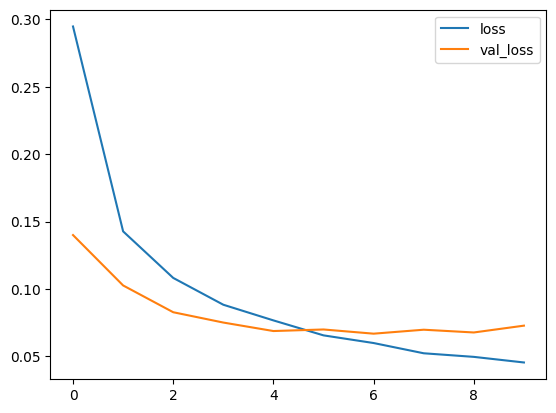

In [6]:


# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()



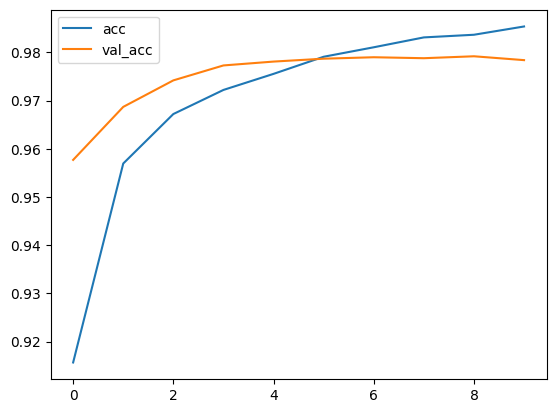

In [7]:


# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()



In [8]:


# Convert the model to TFLite format

# Create a converter object
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tflite_model = converter.convert()

# Save to file
with open("converted_model.tflite", "wb") as f:
  f.write(tflite_model)



In [9]:


# Check if it exists
!ls



converted_model.tflite	sample_data
